Kingdom:  Count: 130
----
Kingdom: Animalia Count: 17018
----
Kingdom: Chromista Count: 9
----
Kingdom: Fungi Count: 2642
----
Kingdom: Plantae Count: 5845
----
Kingdom: Protozoa Count: 138
----
5


<IPython.core.display.Javascript object>


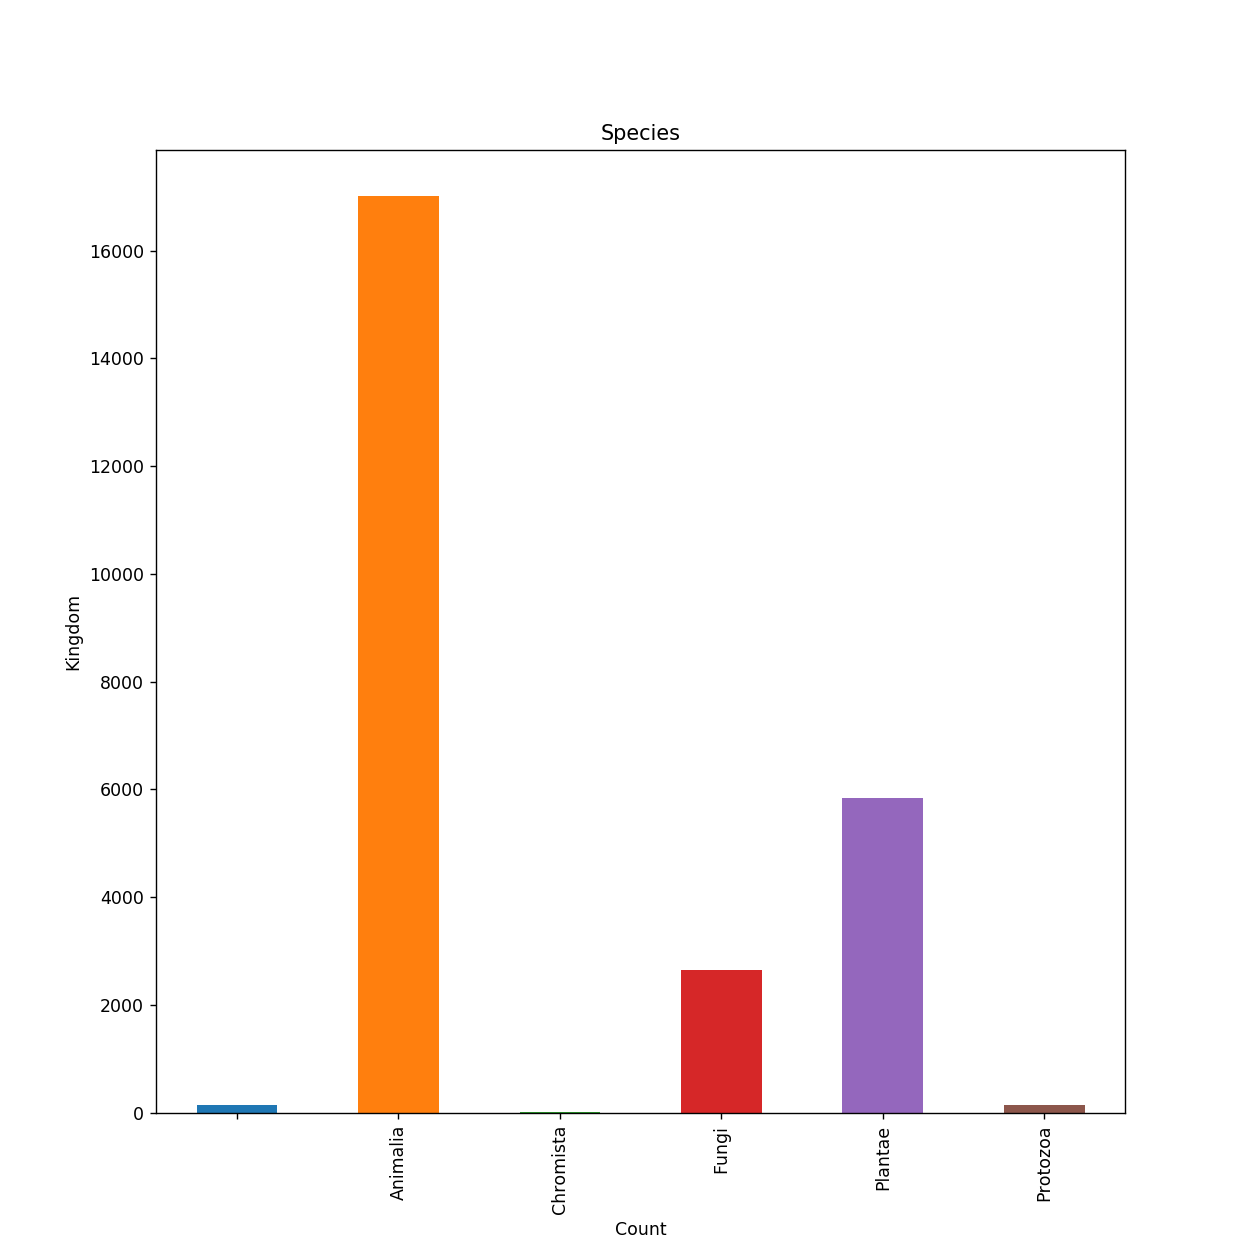

In [10]:
import urllib.request
import urllib.parse
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.graph_objs import *
%matplotlib notebook
import matplotlib.pyplot as plt

#plt.plot([0, 1, 2, 2]);
 
 


url = 'https://data.usgs.gov/solr/occurrences/select/?q={!bbox%20pt=66.62313748,-159.341958%20sfield=geo%20d=1}&rows=100&wt=json&facet=true&facet.limit=-1&facet.mincount=1&facet.pivot=kingdom,scientificName&&indent=true'
f = urllib.request.urlopen(url)
jsonResults=json.loads(f.read().decode('utf-8'))

facets=jsonResults['facet_counts']['facet_pivot']['kingdom,scientificName']
a=0
b=[]
c=[]
for index, item in enumerate(facets):
    a+=1
    print("Kingdom:", item["value"], "Count:",item["count"])
    print("----")
    if item["value"]!="":
        b.append(item["value"])
        c.append(item["count"])
    else:
        b.append(" ")
        c.append(item["count"])
    
    
print(index)
if index==5:
    s = pd.Series([c[0],c[1],c[2],c[3],c[4],c[5]], index=[b[0],b[1],b[2],b[3],b[4],b[5]])
if index==4:
    s = pd.Series([c[0],c[1],c[2],c[3],c[4]], index=[b[0],b[1],b[2],b[3],b[4]])
if index==3:
    s = pd.Series([c[0],c[1],c[2],c[3]], index=[b[0],b[1],b[2],b[3]])
if index==2:
    s = pd.Series([c[0],c[1],c[2]], index=[b[0],b[1],b[2]])
if index==1:
    s = pd.Series([c[0],c[1]], index=[b[0],b[1]])
if index==0:
    s = pd.Series([c[0]], index=[b[0]])
    
s.plot.bar(figsize=(10,10))
plt.xlabel('Count')
plt.ylabel('Kingdom')
plt.title("Species");